<a href="https://colab.research.google.com/github/JongHyun070105/MachineLearning2025/blob/main/3710%EB%B0%95%EC%A2%85%ED%98%84_Chapter6_%EB%B2%94%EC%A3%BC%ED%98%95_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC%ED%95%98%EA%B8%B0(%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 판다스 불러오기
import pandas as pd

# 데이터 읽어오기
df = pd.read_csv('Clean_Dataset.csv')

# 지정 인덱스인 첫번째 칼럼(column) 삭제하기
df.drop(columns=['Unnamed: 0'], inplace=True)

In [2]:
# 랜덤하게 결측치 생성하기
# 랜덤과 넘파이 불러오기
import numpy as np
import random

# 같은 결과 출력을 위해 시드(2025) 고정하기
np.random.seed(2025)

# 원본 df를 복사하여 df_na에 저장
df_na = df.copy()

# 랜덤한 위치에 결측치를 5000개를 포함한 데이터 df_na 생성하기(5,000개 결측치 생성)
for i in range(5000):
  df_na.iloc[random.randint(0,300152),random.randint(1,10)]=np.nan

# 결측치 처리여부 확인을 위한 1번, 3번 인덱스 전체 결측치 처리하기(2개 결측치 생성)
df_na.iloc[1]=np.nan
df_na.iloc[3]=np.nan



In [3]:
# 데이터 변경에 대비하여 원본 데이터df를 복사하여 df_origin에 저
df_origin = df.copy()


# SECTION 02. 범주형 데이터 정제하기

* 데이터 분석처리를 할 때 범주형 데이터를 처리하는 것이 중요
* 예) 남자, 여자 구분을(남, 여) 또는 (M, F)로 표기하지만 컴퓨터는 구별하지 못하므로 컴퓨터 시스템이 이해하기 좋은 숫자 0,1로 변경
* 컴퓨터가 데이터를 이해할 수 있도록 범주형 데이터를 수치형 데이터로 변경하는 과정을 범주형 인코딩 이라고 함.

## 1. 레이블 인코딩 하기
* 레이블 인코딩은 범주형 데이터에 숫자 레이블을 할당함


### 1) 판다스에서 레이블 인코딩하기

In [4]:
# 데이터 구간화 전 원본 불러오기
df=df_origin.copy()


##pd.factorize()는 고유한 값마다 정수 라벨을 할당해 주는 함수
##labels, uniques = pd.factorize(values)
* labels: 각 원소가 어떤 고유 값(카테고리)에 해당하는지를 나타내는 정수 인덱스 배열
* uniques: 중복 없이 정렬된 고유한 값들의 리스트 (Pandas의 Index 객체)

In [5]:
# factorize 예제

import pandas as pd

data = pd.Series(["apple", "banana", "apple", "orange", "banana"])
labels, uniques = pd.factorize(data)

print("Labels:", labels)
print("Uniques:", uniques)
# 라벨 순서는 첫 등장 순서에 따라 정해짐. 알파벳 순 정렬이 아님
# 반환된 정수는 0부터 시작
# NaN 값은 -1로 인코딩

Labels: [0 1 0 2 1]
Uniques: Index(['apple', 'banana', 'orange'], dtype='object')


In [6]:
# factorize로 airline 칼럼 레이블 인코딩하기

df["label_encoding"] = pd.factorize(df["airline"])[0]
df


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,label_encoding
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,2
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,2
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,2
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,2


In [7]:
# pd.factorize()에 의해 어떤 문자열이 어떤 정수(label)로 매핑되었는지를 확인하기
# pd.factorize()의 두 번째 반환값을 활용

lables, uniques = pd.factorize(df['airline'])

for i, airline in enumerate(uniques):
  print(f"{airline} : {lables[i]}")




SpiceJet : 0
AirAsia : 0
Vistara : 1
GO_FIRST : 2
Indigo : 2
Air_India : 2


In [8]:
# airline 칼럼, label_encoding 칼럼의 빈도 확인하기
df[['airline','label_encoding']].value_counts()



,,count
airline,label_encoding,
Vistara,2,127859
Air_India,5,80892
Indigo,4,43120
GO_FIRST,3,23173
AirAsia,1,16098
SpiceJet,0,9011


### 2) 사이킷런으로 레이블 인코딩하기
* 사이킷런(scikit-learn)은 Python에서 가장 널리 사용되는 머신러닝 라이브러리 중 하나

In [10]:
# scikit-learn의 LabelEncoder를 사용해서
# 문자열로 된 항공사 이름(airline 컬럼)을 숫자(Label)로 변환하는 전형적인예 알아보기

# 사이킷런 패키지의 LabelEncoder 불러오기
from sklearn.preprocessing import LabelEncoder


# LabelEncoder 객체 생성하기(le)
le = LabelEncoder()


# df 데이터프레임의 'airline'열 항공사이름에 고유한 정수라벨로 변환하기
df['airline_Label_Encoder'] = le.fit_transform(df['airline'])

df.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,label_encoding,airline_Label_Encoder
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0,4
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0,4
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1,0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2,5
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2,5


In [13]:
# airline 칼럼과 새롭게 만들어진 airline_Label_Encoder 칼럼의 빈도수(value_counts()) 확인하기
print(df['airline'].value_counts())
print(df['airline_Label_Encoder'].value_counts())



airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
airline_Label_Encoder
5    127859
1     80892
3     43120
2     23173
0     16098
4      9011
Name: count, dtype: int64


In [16]:
# 레이블 인코딩 역변환(디코딩)하기
# 숫자로 변환된 항공사 레이블(airline_Label_Encoder)을 다시 원래 항공사 이름(문자열)로 되돌리는 작업

original_name = le.inverse_transform(df['airline_Label_Encoder'])
original_name

original_name_reshaped = np.array(original_name).reshape(-1,1)
original_name_reshaped



array([['SpiceJet'],
       ['SpiceJet'],
       ['AirAsia'],
       ...,
       ['Vistara'],
       ['Vistara'],
       ['Vistara']], dtype=object)

# 2. 원핫 인코딩 하기
* One-Hot Encoding은 범주형 변수의 각 고유 값을 0과 1로 이루어진 이진 벡터로 표현하는 방식
* 각 고유 값마다 **고유한 열(column)**을 생성하고, 해당 값일 경우 1, 아닐 경우 0으로 표시
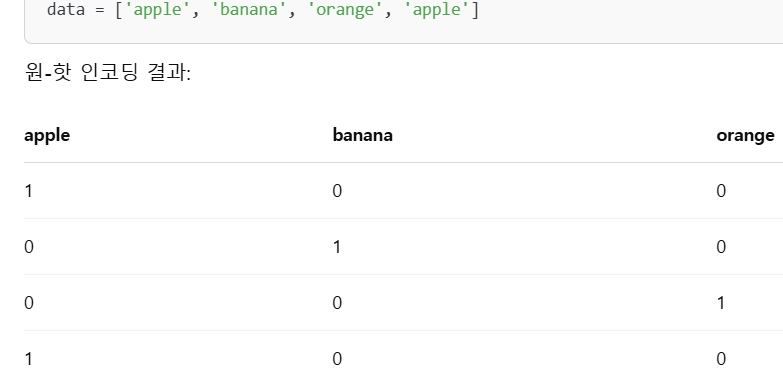

* 범주형(문자형) 데이터를 기계학습 모델에 입력할 때
* 문자열을 단순한 숫자(label)로 변환하면 순서 정보가 생기고 모델이 오해할 수 있음
* 원-핫 인코딩은 이런 순서 없는 카테고리 데이터를 정확히 표현할 수 있음

### 1) 판다스에서 원핫 인코딩하기
* get_dummy()를 사용하면 판다스에서 바로 원핫 인코딩 가능
* 좌석등급(class)컬럼 원핫인코딩

In [17]:
#레이블 인코딩 전 원본데이터(df_origin) 불러오기
df=df_origin.copy()


#class 칼럼을 원핫인코딩 하기
pd.get_dummies(df['class'])




,Business,Economy
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
300148,True,False
300149,True,False
300150,True,False
300151,True,False


In [18]:
# 원핫 인코딩 결과를 데이터에 반영하기
df = pd.get_dummies(df, columns=['class'],dtype = int)
df.head()



,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price,class_Business,class_Economy
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,2.17,1,5953,0,1
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,2.33,1,5953,0,1
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,2.17,1,5956,0,1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,2.25,1,5955,0,1
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,2.33,1,5955,0,1


## 2) 사이킷런으로 원핫 인코딩하기
* 사이킷런에서도 원핫 인코더 모듈을 제공
* 판다스의  get_dummies()와 같이 바로 데이터프레임으로 반영할 수 없으므로 원핫 인코딩 후 데이터를 추가하기 위해 컬럼을 만들고 추가하는 작업이 필요

In [21]:
#판다스 원핫인코딩 전 원본데이터(df_origin) 불러오기

df=df_origin.copy()

#사이킷런 패키지에서 OneHotEncoder 불러오기
from sklearn.preprocessing import OneHotEncoder



#OneHotEncoder로 원핫 인코딩 하기
# 1. OneHotEncoder 객체 생성
oh = OneHotEncoder()

# df['class']에 있는 범주형 데이터를 One-Hot 인코딩하여 2차원 배열로 반환
encoder = oh.fit_transform(df['class'].values.reshape(-1,1)).toarray().astype(int)
encoder

#원핫인코딩 결과를 데이터프레임으로 만들기
# encoder 배열 → DataFrame으로 바꾸기
# columns= 옵션으로 각 열의 이름 지정하기

df_onehot = pd.DataFrame(encoder, columns=['class_'+str(oh.categories_[0][i]) for i in range(len(oh.categories_[0]))])



#원핫 인코딩 결과를 원본 데이터에 붙여넣기

df1 = pd.concat([df, df_onehot],axis = 1)
df1.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,class_Business,class_Economy
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0,1
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0,1
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0,1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0,1
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0,1


# SECTION 03. 스케일링 하기
##스케일링(Scaling)**은 머신러닝에서 매우 중요한 데이터 전처리 과정 중 하나로, 특성(Feature)의 값을 일정한 범위로 조정하는 작업

## 1. 정규화(Normalization)하기
* 데이터의 전체 크기(길이, 크기)를 조정해서,
값들을 동일한 기준(보통 0~1 또는 벡터의 길이 1)에 맞추는 것
* Min-Max 정규화 (0 ~ 1 사이로 조정)각 열(column)의 최소값과 최대값 기준으로 값을 0~1 사이로 조정

* 공식:
###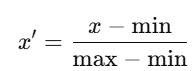

In [23]:
# 원핫 인코딩 전 원본데이터(df_origin) 불러오기

df= df_origin.copy()

# 수치형 데이터만 분리하여 데이터프레임 만들기
# 수치형이 아닌 데이터는 결측치만 만들어 내기 때문에 수치형 데이터['duration', 'days_left', 'price']만 따로 분리
df_num = df[['duration','days_left','price']]


# 정규화 수식적용하기
df_num = (df_num - df_num.min()) / (df_num.max() - df_num.min())
df_num.head()



,duration,days_left,price
0,0.027347,0.0,0.039749
1,0.030612,0.0,0.039749
2,0.027347,0.0,0.039773
3,0.028980,0.0,0.039765
4,0.030612,0.0,0.039765


In [24]:
# 요약 데이터 확인해서 정규화 적용 확인하기
df_num.describe()


,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,0.232470,0.520932,0.162215
std,0.146775,0.282521,0.186099
min,0.000000,0.000000,0.000000
25%,0.122449,0.291667,0.030156
50%,0.212653,0.520833,0.051818
75%,0.313061,0.770833,0.339570
max,1.000000,1.000000,1.000000


In [ ]:
# 3개의 컬럼 값이 모두 min 0, max 1인 값으로 정규화 됨
# min-max scaling은 극단적인 이상치에 민감하므로 유의 해서 사용하고, 이상치를 처리한 뒤 정규화를 진행해야 함



## 2. 표준화하기
* 표준화는 스케일링 방법 중 하나로, 데이터의 평균을 0, 표준편차를 1로 맞추는 작업
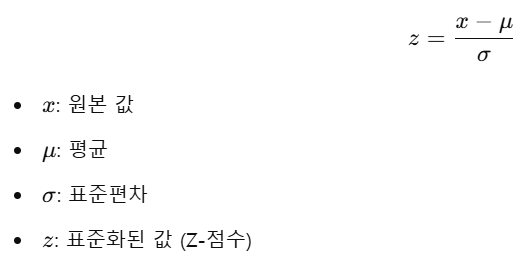

In [26]:
# 수치형 데이터만 분리하여 데이터프레임 만들기
df_num = df[['duration','days_left','price']]



# 표준화 수식 적용하기
df_num = ((df_num - df_num.mean()) / df_num.std())
df.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [27]:
# 요약 데이터 확인해서 표준화 적용 확인하기
df_num.describe()



,duration,days_left,price
count,3.001530e+05,3.001530e+05,3.001530e+05
mean,9.090311e-17,1.810487e-16,-1.939266e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.583847e+00,-1.843872e+00,-8.716567e-01
25%,-7.495861e-01,-8.114997e-01,-7.096143e-01
50%,-1.350141e-01,-3.503362e-04,-5.932152e-01
75%,5.490796e-01,8.845399e-01,9.530162e-01
max,5.229282e+00,1.695689e+00,4.501823e+00


In [28]:
# 기존의 df에서 duration, days_left, price 칼럼 삭제하기

df.drop(['duration','days_left','price'],axis = 1)

# 표준화된 duration, days_left, price 칼럼 붙이기
pd.concat([df,df_num], axis = 1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# SECTION 04. 변수 선택하기


## 1. 신규 변수 생성하기

### 1) 하나의 데이터로 여러 개의 새로운 칼럼 만들기

##lambda란?
###lambda는 함수를 간단하게 한 줄로 정의할 수 있는 문법
###일반적인 def 함수 대신 짧고 일시적인 함수가 필요할 때 사용
##  lambda 인자1, 인자2, ... : 표현식
* def와 달리 함수 이름이 없음
* return 키워드도 쓰지 않고, 결과를 자동 반환함
* 결과는 "함수" 자체이므로 변수에 담거나 바로 사용할 수 있음


##apply()란?
###Pandas의 apply()는 Series 또는 DataFrame에 함수를 "적용"하는 메서드
* Series.apply(함수) → 각 요소에 함수 적용
* DataFrame.apply(함수, axis=0 또는 1)
* axis=0: 열(column) 기준
* axis=1: 행(row) 기준



##zip()
* zip()은 여러 개의 리스트(또는 iterable)를 “묶어서” 하나의 튜플로 만들어주는 함수
* 같은 인덱스끼리 쌍(pair)을 만들어 줌
* 결과는 zip object → list(), dict(), set() 등으로 바꿔서 씀



In [30]:
# 항공기 기종을 제조사 코드와 모델명으로 분리하는 split_flight 함수 만들기
def split_flight(flight) :
    # "-" 문자를 기준으로 앞쪽을 제조사 코드로 저장
    manufacture = flight.split('-')[0]

    # "-" 문자를 기준으로 뒤쪽을 모델명으로 저장
    model_num = flight.split('-')[1]

    # 제조사코드와 모델명을 반환
    return manufacture, model_num


#  제조사코드와 모델명
#  df['manufacture'], df['model_num']에 저장하기
df['manufacture'], df['model_num'] = zip(*df['flight'].apply(lambda x : split_flight(x)))


df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,manufacture,model_num
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,SG,8709
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,SG,8157
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,I5,764
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,UK,995
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,UK,963


### 2) 여러 개의 데이터로 하나의 새로운 칼럼 만들기

In [31]:
#source_city, destination_city를 튜블로 묶어 route 칼럼 생성하기

df['route'] = df.apply(lambda x : (x['source_city'], x['destination_city']), axis = 1)

df.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,manufacture,model_num,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,SG,8709,"(Delhi, Mumbai)"
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,SG,8157,"(Delhi, Mumbai)"
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,I5,764,"(Delhi, Mumbai)"
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,UK,995,"(Delhi, Mumbai)"
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,UK,963,"(Delhi, Mumbai)"


In [32]:
# 'manufacture', 'model_num'컬럼 제거하기

df.drop(['manufacture','model_num'],axis = 1).head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,"(Delhi, Mumbai)"
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,"(Delhi, Mumbai)"
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,"(Delhi, Mumbai)"
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,"(Delhi, Mumbai)"
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,"(Delhi, Mumbai)"


## 2. 변수 선택하기

### 1) RFE(Recursive Feature Elimination)
* Recursive Feature Elimination (재귀적 특징 제거)
→ 덜 중요한 특성을 하나씩 제거하면서 모델 성능이 최적인 특성 조합을 찾아가는 방법

### 2) RFE-CV(Recursive Feature Elimination with Cross Validation)
* RFE-CV는 **특성 선택(feature selection)**을 하면서 동시에 교차 검증을 통해 최적의 특성 개수도 자동으로 찾는 고급 기법

### 3) UFS (Univariate Feature Selection)
* UFS (Univariate Feature Selection)**은 머신러닝에서 간단하면서도 효과적인 특성 선택 방법입니다.
이 방식은 각각의 특성(feature)을 독립적으로(uni-variate) 평가하여 좋은 특성만 선택

## [확인 문제 1] 어떤 데이터의 info를 확인해 보니 다음과 같이 나타났습니다. 'class'컬럼의 결측치는 몇개 인가요?
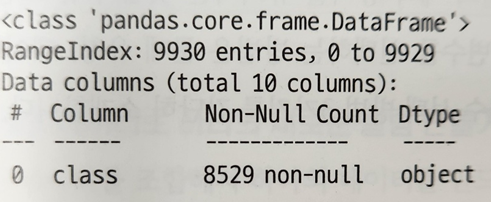

In [35]:
#이곳에 [확인문제1] 답을 쓰세요

missing = df['class'].isnull().sum()
print(missing)


0


## [확인문제2] 변수 선택 방법 중 원하는 변수의 수에 도달 할 때 까지 가장 중요하지 않은 특성을 재귀적으로 제거하는 방법은 무엇인가요?

In [ ]:
#이곳에 [확인문제2] 답을 쓰세요

RFE(Recursive Feature Elimination)

## [확인문제3] '결측치 삭제하기'방법 중 데이터의 손실을 최소화하기 위해 모든 컬럼이 결측치인 데이터만 삭제하려면 어떤 파라미터를 어떻게 변경해야 할까요?

In [ ]:
#이곳에 [확인문제3] 답을 쓰세요.

df.dropna(how='all', inpalce = True)

## [확인문제4] 다음은 상자그래프로 이상치를 나타내는 기준에 대한 설명입니다. 괄호(1)과 (2)에 들어갈 내용은 무엇인가요?

###상자 그래프에서 이상치를 표시하는 기준은 제1사분위수에서 (   1    )의  (    2     )배 만큼을 뺀 값보다 작거나, 3사분위수에서 (   1    )의  (    2     )배만큼을 더한 값보다 큰 값입니다.

In [ ]:
#이곳에 [확인문제4] 답을 쓰세요.

# (1) IQR
# (2) 1.5

## [확인문제5]데이터의 손실을 방지하기 위해 '대체하기'로 이상치를 처리할 때 고려해야 할 점은 무엇인가요?

In [ ]:
#이곳에 [확인문제5] 답을 쓰세요.

# 1. 이상치의 원인을 분석
# 2. 이상치 탐지 기준이 명확
# 3. 대체 방법 선택

## [확인문제6] 판다스의 factoize의 scikit-learn의 LabelEncoding는 무슨 차이가 있나요?


In [ ]:
#이곳에 [확인문제6] 답을 쓰세요.



## [확인문제7] 원핫 인코딩 된 컬럼을 바로 데이터프레임에 반영하기 위해 사용할 수 있는 메소드는 무엇인가요?

In [ ]:
#이곳에 [확인문제7] 답을 쓰세요.




## [확인문제8] 제조원가는 달러(USD)로, 판매가는 원화(KRW)로 표기한 데이터가 있을 떄, 컴퓨터는 어떤 가격의 영향을 더 크게 반영하나요?

In [ ]:
#이곳에 [확인문제8] 답을 쓰세요.




## [확인문제9] min-max Scaling을 위한 산식은 무엇인가요?

In [ ]:
#이곳에 [확인문제9] 답을 쓰세요.

